# **CLASSIFICATION**

Machine learning and statistics; classification is a controlled learning approach that the computer program learns from the given data entry and then uses this learning to classify new observations. These datasets are either bi-class (such as determining whether a person is male or female, an e-mail is spam or spam) or multi some examples of classification problems are: voice recognition, handwriting recognition, biometric identification, document classification, etc.
Here we have types of classification algorithms in machine learning:
1. Linear Classifiers: Logistic Regression, Naive Bayes Classifier
2. Support Vector Machines
3. Decision Trees
4. Increased Trees
5. Random Forests
6. Neural Networks
7. Nearest Neighbor

# Loading Dataset and Data Information

In [ ]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline







In [ ]:
wine=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [ ]:
wine.head(20)

In [ ]:
wine.tail(20)

In [ ]:
wine.info()

# Data Visualization

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

# Categorizing Data

In [ ]:
wine.quality = [1 if each >= 7 else 0 for each in wine.quality]
wine.quality

In [ ]:
wine.quality.value_counts()

In [ ]:
sns.countplot(wine.quality)

In [ ]:
y = wine.quality.values
y

In [ ]:
x_data = wine.drop(["quality"],axis=1)
x_data

# Data Normalization

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

# Create Test and Train Arrays

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


# Random Forest Classifier

 Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.
 
 First, the Random Forest algorithm is a controlled classification algorithm. (Supervised classification algorithm). As we can see from the name, the algorithm simply creates a forest randomly. There is a direct relationship between the number of trees in the algorithm and the results they can achieve. As the number of trees increases, we get a definite result.
[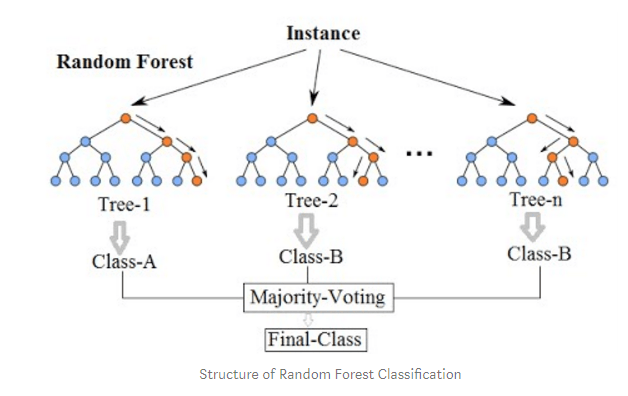](http://)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
RF = RandomForestClassifier(n_estimators=200, random_state=1)
RF.fit(x_train,y_train)
predictions = RF.predict(x_test)
score = round(accuracy_score(y_test, predictions), 5)
print("Random Forest Score {}".format(score))


# Cross Validation

Machine learning is an iterative process.
You will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives.
You've already known to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

[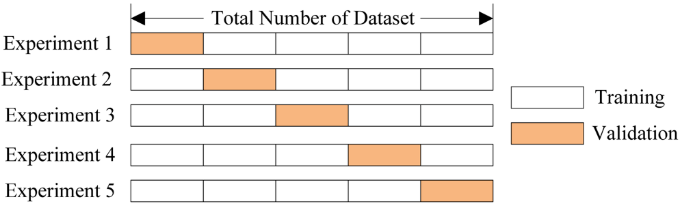](http://)

In [ ]:
from sklearn.model_selection import  cross_val_score
RF_CrossValidation = cross_val_score(estimator=RF, X=x, y=y, cv = 40)
print("Random Forest Cross Validation Score ",RF_CrossValidation.max())

# Stochastic Gradient Decent Classifier

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(penalty=None)
SGD.fit(x_train,y_train)
predictions = SGD.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Stochastic Gradient Decent Score {}".format(score))

# Support Vector Machine Classifier

Support Vector Machines; Let's assume that we place our data with 2 classes on the coordinate system. If our properties (feature, axis) are suitable, we should be able to see our data in 2 groups. Let's divide it with such a line that we can classify this data set. Learning methods that enable us to find this line do not have to be a single line, are called Support Vector Machines (SVM). With SVM, not only classification, but also regression can be done.
It is an algorithm that we need to label our data, which is supervised. Because while doing the separation process I mentioned above, our algorithm will make the error calculation according to the labels of the data points.

[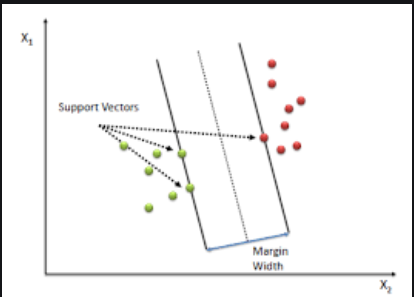](http://)

In [ ]:
from sklearn.svm import SVC
SVM = SVC(random_state=1)
SVM.fit(x_train,y_train)
predictions = SVM.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Support Vector Machine Score {}".format(score))

# Grid Search CV

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
 If you work with ML, you know what a nightmare it is to stipulate values for hyper parameters. There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process and make life a little bit easier for ML enthusiasts.

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    'C'     :[0.1,0.5,0.9,1,1.5,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
SVM_GridSearchCV = GridSearchCV(SVM, param_grid=param, scoring='accuracy', cv=40)
SVM_GridSearchCV.fit(x_train,y_train)
SVM_GridSearchCV.best_params_

In [ ]:
SVM_BestGridSearchCV1 = SVC(C = 1.5, gamma = 1.3, kernel = 'rbf')
SVM_BestGridSearchCV1.fit(x_train,y_train)
predictions = SVM_BestGridSearchCV1.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Support Vector Machine Grid Search CV Score {}".format(score))